interactive(children=(IntSlider(value=-90, description='L1', max=0, min=-100, step=5), IntSlider(value=-90, de…

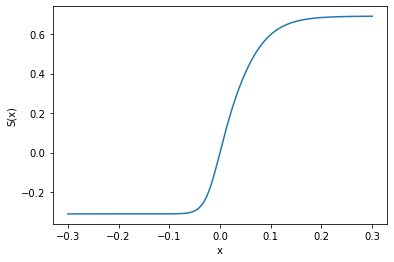

In [1]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  


def sigmoid(Y):
# sigmoidal nonlinearity (assumed to simulate conductivity of mechanoelektrical transduction channels)    
# probably represents a dominant nonlinearity in the auditory system at moderate to high levels

    y1=0.01139
    y2=0.03736
    c1=0.7293
    c2=1.4974
    b=0.30991

    
    Z = 1/(1+c1*np.exp(-Y/y1)+c2*np.exp(-Y/y2))-b
    
    return Z

    
f1 = 2000  # Hz
f2 = 2200  # Hz
fs = 10e3  # sampling freq
t = np.linspace(0, (1000-1)*1/fs, 1000)

# plot spectrum
fx = np.arange(0,len(t))*fs/len(t) # frequency axis

'''
fig, ax1 = plt.subplots()
ax1 = plt.plot(t,tone1)


fig, ax2 = plt.subplots()
ax2.plot(fx,np.abs(np.fft.fft(tone1)))
ax2.set_xlabel('Frequency (HZ)')
ax2.set_ylabel('Amplitude (-)')
ax2.set_xlim(0,fs/2)
'''

def process_nonlin(L1=-90, L2=-90):
    
    tone1 = np.sqrt(2)*10**(L1/20) * np.sin(2*np.pi*f1*t)
    tone2 = np.sqrt(2)*10**(L2/20) * np.sin(2*np.pi*f2*t)
    
    output = sigmoid(tone1 + tone2)
    
    fig, ax3 = plt.subplots()
    ax3.plot(fx, 20*np.log10(np.sqrt(2)*np.abs(np.fft.fft(output))/len(output)))
    ax3.set_xlabel('Frequency (Hz)')
    ax3.set_ylabel('Amplitude (dB re 1)')
    ax3.set_xlim(0,fs/2)
    ax3.set_ylim(-100,0)
    plt.show()

    fig.canvas.draw()


widgets.interact(process_nonlin, L1=(-100, 0, 5), L2 = (-100, 0, 5))    

x = np.linspace(-3e-1,3e-1,1024)
fig, ax1 = plt.subplots()
plt.plot(x,sigmoid(x))
ax1.set_xlabel('x')
ax1.set_ylabel('S(x)')
plt.show()